# Analysis_on_progress_towards_SDG7
### By Hafsah Anibaba

The data to be used has been extracted from the original data retrieved from the worldbank website through this <a href= 'api.worldbank.org/v2/country'>link</a><br>
After data wrangling process <a href= '../Data_wrangling_on_progress_towards_SDG7/Target7_1.ipynb'>here</a>, data was extracted and cleaned for the goal target

In [1]:
# import all necessay libraies

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Target 7.1: By 2030, ensure universal access to affordable, reliable and modern energy services
<b> 
    * Check trend in access to energy over the years
    * Check countries with high access and countries with low access
    * Check countries with significantly high change
    * Check countries with significantly low change

In [2]:
#read in the data available for all countries on access to electricity

data1 = pd.read_csv('../data/extracted_data/years_with_data_for_all_countries.csv', index_col = 'Country Name')

data1.head(2)

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,
Aruba,100.000000,93.356293,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000
Africa Eastern and Southern,26.181557,27.557137,29.089827,31.844384,31.79416,32.001027,33.87191,38.880173,40.261358,43.061877,44.27086,45.803485


In [3]:
#read in the data of countries that had data for all the years

data2 = pd.read_csv('../data/extracted_data/countries_that_had_data_for_all_years.csv', index_col = 'Country Name')

data2.head(2)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,100.0,99.153656,99.197128,99.239914,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
New Zealand,100.0,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


### EDA

In [4]:
print(f'This data has records on {data1.shape[0]} countries for {data1.shape[1]} years')

This data has records on 264 countries for 12 years


In [5]:
data1T = data1.T
 
data1T.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2009,100.000000,26.181557,46.740051,41.816861,33.802189,100.000000,100.0,84.313484,100.0,97.750656,...,100.0,96.099998,33.291115,82.849047,97.900002,99.090909,59.501240,82.599998,26.503071,43.369083
2010,93.356293,27.557137,42.700001,41.799858,34.895638,100.000000,100.0,87.114863,100.0,98.820000,...,100.0,97.430000,44.099998,83.222541,96.361053,99.000000,60.675194,82.900002,22.000000,38.782551
2011,100.000000,29.089827,43.222019,45.911474,34.599998,100.000000,100.0,87.332661,100.0,99.095352,...,100.0,99.000000,41.935329,82.166583,96.668571,99.375000,61.864506,83.599998,28.159010,36.900002
2012,100.000000,31.844384,69.099998,44.167973,37.131321,99.900002,100.0,87.039588,100.0,99.229980,...,100.0,97.889999,43.789528,84.740710,96.826935,99.750000,52.410000,85.300003,29.012726,44.000000
2013,100.000000,31.794160,68.290649,47.048316,38.278030,100.000000,100.0,88.992620,100.0,99.342674,...,100.0,98.554962,31.700001,85.240416,97.416534,99.750000,75.599998,85.199997,29.886272,40.498375


In [6]:
data1T['mean per year'] = data1T.mean(axis = 1)

data1T.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,mean per year
2009,100.000000,26.181557,46.740051,41.816861,33.802189,100.000000,100.0,84.313484,100.0,97.750656,...,96.099998,33.291115,82.849047,97.900002,99.090909,59.501240,82.599998,26.503071,43.369083,78.608207
2010,93.356293,27.557137,42.700001,41.799858,34.895638,100.000000,100.0,87.114863,100.0,98.820000,...,97.430000,44.099998,83.222541,96.361053,99.000000,60.675194,82.900002,22.000000,38.782551,79.302329
2011,100.000000,29.089827,43.222019,45.911474,34.599998,100.000000,100.0,87.332661,100.0,99.095352,...,99.000000,41.935329,82.166583,96.668571,99.375000,61.864506,83.599998,28.159010,36.900002,80.004736
2012,100.000000,31.844384,69.099998,44.167973,37.131321,99.900002,100.0,87.039588,100.0,99.229980,...,97.889999,43.789528,84.740710,96.826935,99.750000,52.410000,85.300003,29.012726,44.000000,80.904409
2013,100.000000,31.794160,68.290649,47.048316,38.278030,100.000000,100.0,88.992620,100.0,99.342674,...,98.554962,31.700001,85.240416,97.416534,99.750000,75.599998,85.199997,29.886272,40.498375,81.444199


In [7]:
data1T.loc['mean per country'] = data1T.mean(axis = 0)


data1T.tail()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe,mean per year
2017,100.000000,40.261358,97.699997,48.861191,43.013260,99.889999,100.0,90.324659,100.0,100.000000,...,100.000000,62.799999,88.594052,96.800003,99.800003,79.199997,84.400002,40.299999,44.178635,84.582690
2018,100.000000,43.061877,96.616135,51.259712,45.290001,100.000000,100.0,88.910749,100.0,99.989578,...,100.000000,61.754513,89.566532,99.994476,99.900002,62.000000,84.699997,40.317890,45.572647,85.338844
2019,100.000000,44.270860,97.699997,51.290193,45.642799,100.000000,100.0,89.999946,100.0,100.000000,...,99.400002,64.590187,90.011785,99.199997,100.000000,72.751076,85.000000,43.000000,46.781475,85.813698
2020,100.000000,45.803485,97.699997,52.111601,46.890610,100.000000,100.0,90.277735,100.0,100.000000,...,100.000000,67.333267,90.521569,100.000000,100.000000,73.757927,84.385536,44.524475,52.747669,86.472613
mean per country,99.446358,35.384813,76.539070,47.465524,39.613081,99.967500,100.0,88.349884,100.0,99.475267,...,98.883022,50.864707,86.406498,98.146496,99.667160,66.669197,84.432128,33.177408,41.782681,82.596240


In [8]:
average_access_per_country = data1T.iloc[-1]
average_access_per_country

Country Name
Aruba                          99.446358
Africa Eastern and Southern    35.384813
Afghanistan                    76.539070
Africa Western and Central     47.465524
Angola                         39.613081
                                 ...    
Yemen, Rep.                    66.669197
South Africa                   84.432128
Zambia                         33.177408
Zimbabwe                       41.782681
mean per year                  82.596240
Name: mean per country, Length: 265, dtype: float64

In [9]:
data1T = data1T.drop(data1T.index[-1])

In [10]:
data1T.index = pd.to_datetime(data1T.index)

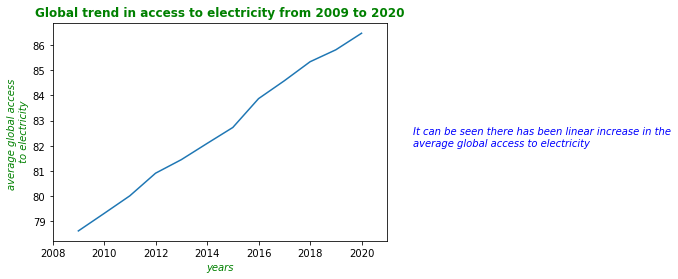

In [11]:
sns.lineplot(y = data1T['mean per year'], x = data1T.index)
plt.xlim(pd.Timestamp('2008-01-01'), pd.Timestamp('2021-01-01'))
plt.title('Global trend in access to electricity from 2009 to 2020', pad = 7,
         fontdict = {'color': 'green', 'weight': 'bold'});
plt.xlabel('years', fontdict = {'color': 'green', 'weight': 'light', 'style': 'italic'})
plt.ylabel('average global access \n to electricity', 
           fontdict = {'color': 'green', 'weight': 'light', 'style': 'italic'});
plt.text(pd.Timestamp('2022-01-01'), 82, 'It can be seen there has been linear increase in the\n\
average global access to electricity', fontdict = {'color': 'blue', 'weight': 'light',\
                                                   'style': 'italic'});

In [12]:
full_access = average_access_per_country[average_access_per_country == 100].index.to_list()

In [13]:
percent = (len(full_access)/ data1.shape[0]) *100
print(f'{percent:.2f}% of the countries have average of 100% of their population with \
access to electricity from 2009 to 2020')

25.38% of the countries have average of 100% of their population with access to electricity from 2009 to 2020


In [14]:
def world_cloud(data, title):
    word_could_dict=Counter(data)
    wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.title(title, pad = 7,
         fontdict = {'color': 'green', 'weight': 'bold', 'fontsize': 32});

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    

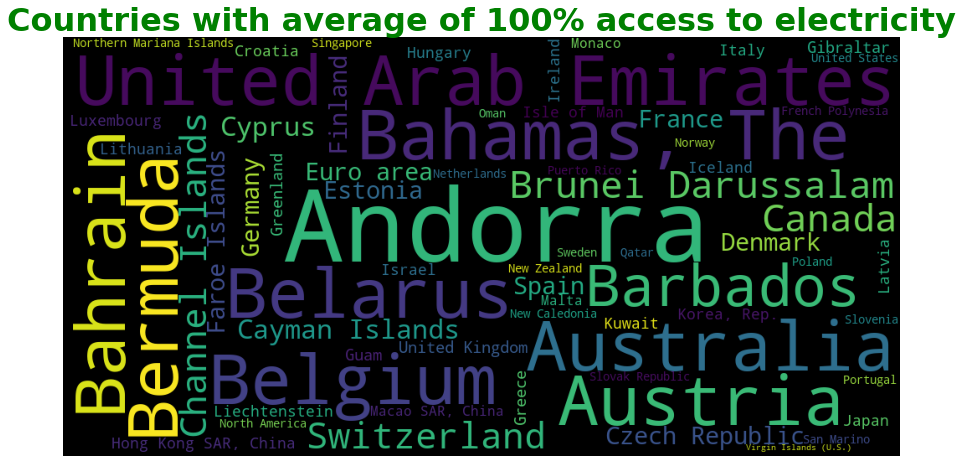

In [15]:
world_cloud(full_access, 'Countries with average of 100% access to electricity')

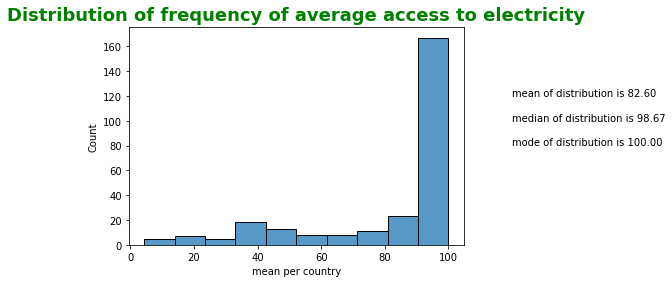

In [16]:
plt.title('Distribution of frequency of average access to electricity', pad = 7,
         fontdict = {'color': 'green', 'weight': 'bold', 'fontsize': 18});
sns.histplot(data = average_access_per_country, bins = 10);
dist = {'mean of distribution': average_access_per_country.mean(),\
       'median of distribution': average_access_per_country.median(),\
       'mode of distribution': int(average_access_per_country.mode().values)}

for i in range(len(dist)):
    plt.text(120, 120 -(20 *i), f'{list(dist)[i]} is {dist[list(dist)[i]]:0.2f}')
    

<b> Most countries have access between 90% to 100% to electricity between 2009 and 2020.

In [17]:
less_access = average_access_per_country[average_access_per_country < 50].index.to_list()

In [18]:
percent = (len(less_access)/ data1.shape[0]) *100
print(f'{percent:.2f}% of the countries have less than 50% average of their population with access to electricity')

17.05% of the countries have less than 50% average of their population with access to electricity


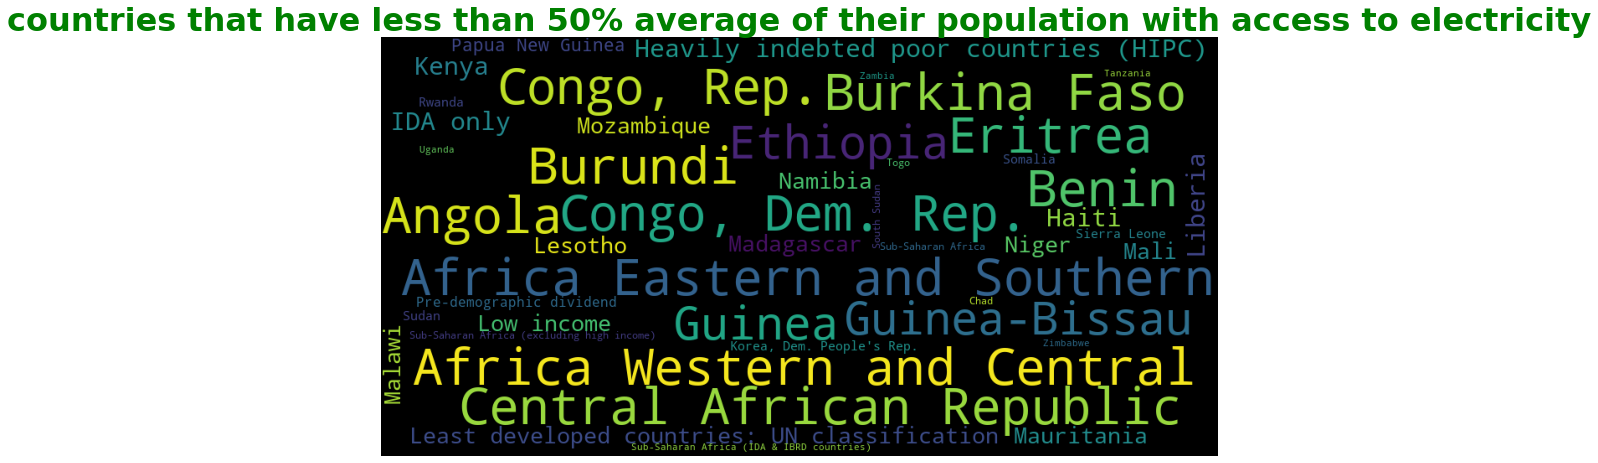

In [19]:
world_cloud(less_access, 'countries that have less than 50% average of their population with access to electricity')

In [20]:
data_change = data1.copy()
data_change.head()

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,
Aruba,100.000000,93.356293,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Africa Eastern and Southern,26.181557,27.557137,29.089827,31.844384,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485
Afghanistan,46.740051,42.700001,43.222019,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997
Africa Western and Central,41.816861,41.799858,45.911474,44.167973,47.048316,47.599323,46.766294,50.953487,48.861191,51.259712,51.290193,52.111601
Angola,33.802189,34.895638,34.599998,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799,46.890610


In [21]:
data_change['change'] = data_change['2020'] - data_change['2009']

In [22]:
positive_change = data_change[data_change['change'] > 0]
print(f'Number of countries with positive change is {len(positive_change)}')

Number of countries with positive change is 179


In [23]:
negative_change = data_change[data_change['change'] < 0]
print(f'Number of countries with negative change is {len(negative_change)}')

Number of countries with negative change is 6


In [24]:
no_change = data_change[data_change['change'] == 0]

print(f'Number of countries with no change is {len(no_change)}')

Number of countries with no change is 79


In [25]:
high = str(data_change[data_change['change'] == data_change['change'].max()].index[0])
print(f'The country with highest change is {high}')

The country with highest change is Solomon Islands


In [26]:
low = str(data_change[data_change['change'] == data_change['change'].min()].index[0])
print(f'The country with highest change is {low}')

The country with highest change is Libya


In [27]:
def plot_trends(data, observation, title):
    plt.figure(figsize = (10,5))
    sns.lineplot(data = data)
    plt.ylim(0, 120)
    plt.legend(bbox_to_anchor = (1.5, 1))
    plt.title(title, pad = 7,
         fontdict = {'color': 'green', 'weight': 'bold', 'fontsize': 18})
    plt.text(0, -10, f'{observation}', fontdict = {'color': 'green', 'weight': 'bold', 'fontsize': 20},
        wrap =True, verticalalignment = 'top');

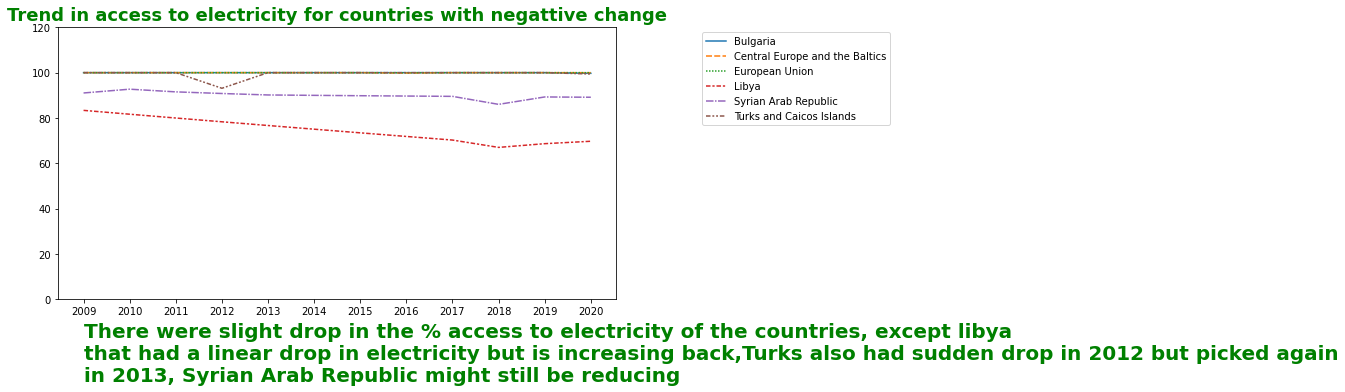

In [28]:
plot_data = negative_change.iloc[:,:-1].T
observation = '''There were slight drop in the % access to electricity of the countries, except libya 
that had a linear drop in electricity but is increasing back,Turks also had sudden drop in 2012 but picked again
in 2013, Syrian Arab Republic might still be reducing'''
title = 'Trend in access to electricity for countries with negattive change'
plot_trends(plot_data, observation, title)

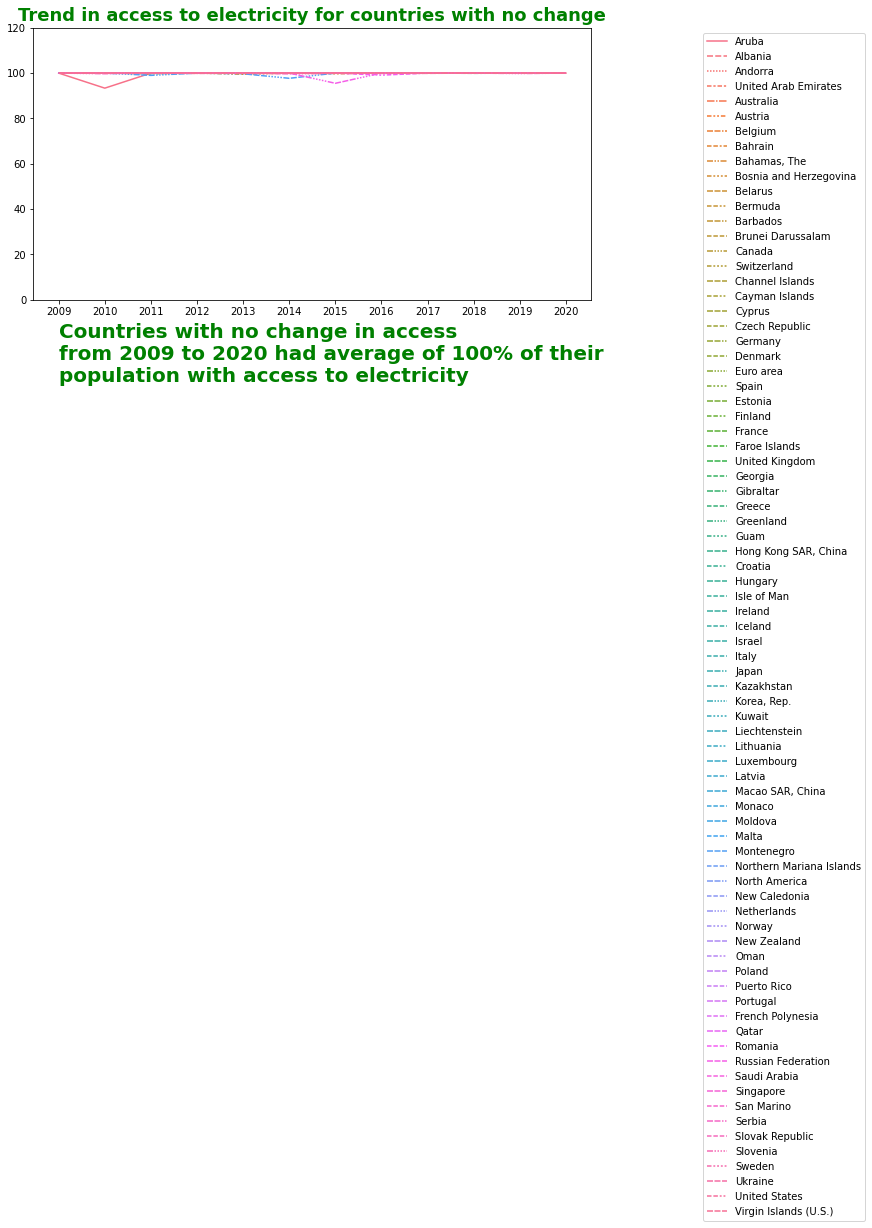

In [29]:
plot_data = no_change.iloc[:,:-1].T
observation = '''Countries with no change in access
from 2009 to 2020 had average of 100% of their
population with access to electricity'''
title = 'Trend in access to electricity for countries with no change'
plot_trends(plot_data, observation, title)

<b>many countries had positive change I want to check trend in countries that had higher than 30% change from 2009 to 2020

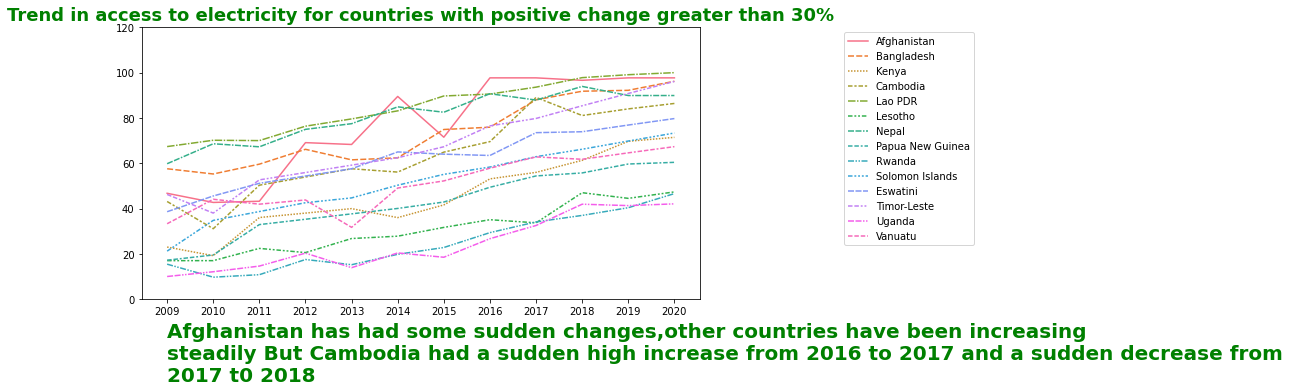

In [30]:
greater_than_30 = positive_change[positive_change['change'] > 30]
plot_data = greater_than_30.iloc[:,:-1].T
observation = '''Afghanistan has had some sudden changes,other countries have been increasing
steadily But Cambodia had a sudden high increase from 2016 to 2017 and a sudden decrease from
2017 t0 2018'''
title = 'Trend in access to electricity for countries with positive change greater than 30%'
plot_trends(plot_data, observation, title)

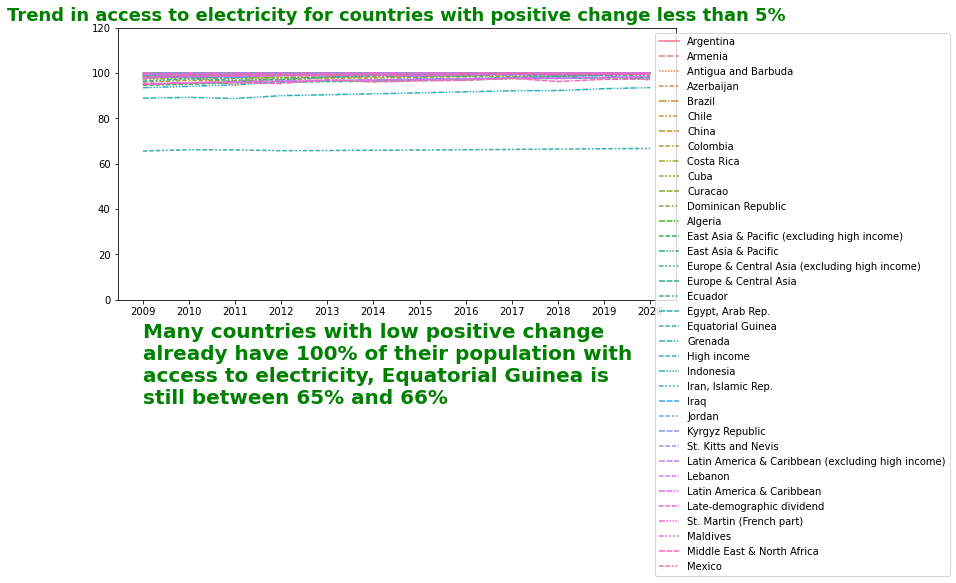

In [31]:
less_than_5 = positive_change[positive_change['change'] < 5]
length = len(less_than_5)
plot_data = less_than_5.iloc[:length // 2,:-1].T
observation = '''Many countries with low positive change 
already have 100% of their population with 
access to electricity, Equatorial Guinea is 
still between 65% and 66%'''
title = 'Trend in access to electricity for countries with positive change less than 5%'
plot_trends(plot_data, observation, title)

<b> Because many countries had less than 5% change I will divide them into two parts for visualisation

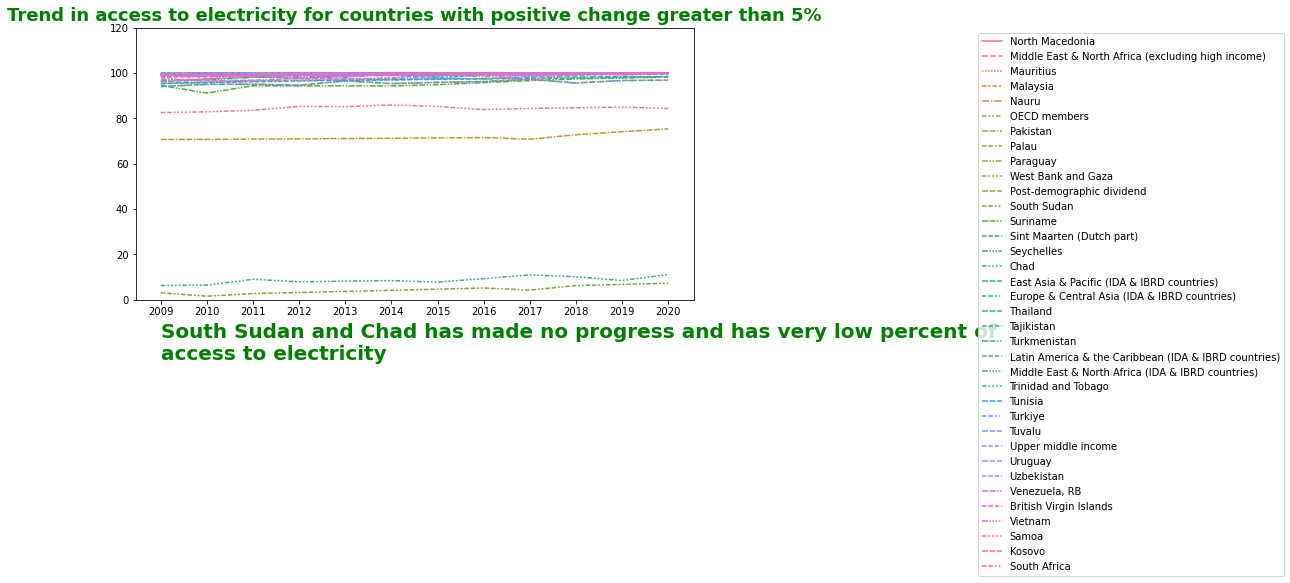

In [32]:
less_than_5 = positive_change[positive_change['change'] < 5]
length = len(less_than_5)
plot_data = less_than_5.iloc[length // 2:,:-1].T
observation = '''South Sudan and Chad has made no progress and has very low percent of
access to electricity'''
title = 'Trend in access to electricity for countries with positive change greater than 5%'
plot_trends(plot_data, observation, title)

In [33]:
data2T = data2.T

In [34]:
data2T['mean per year'] = data2T.mean(axis = 1)

data2T.head()

Country Name,Aruba,New Zealand,Nauru,Norway,Netherlands,Nigeria,New Caledonia,North America,Mauritius,Northern Mariana Islands,...,European Union,Estonia,Spain,Euro area,Europe & Central Asia,Denmark,Germany,Cyprus,Zambia,mean per year
1990,100.000000,100.0,98.999084,100.0,100.0,27.300000,99.844307,100.0,99.041565,99.853264,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,13.900000,96.603169
1991,99.153656,100.0,99.041306,100.0,100.0,35.234600,99.875816,100.0,99.070679,99.884377,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,12.752703,96.817076
1992,99.197128,100.0,99.083420,100.0,100.0,36.099461,99.906868,100.0,99.099678,99.915031,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,19.200000,96.903275
1993,99.239914,100.0,99.124855,100.0,100.0,36.963646,99.937256,100.0,99.128006,99.944923,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,14.213207,96.926624
1994,100.000000,100.0,99.164925,100.0,100.0,37.826469,99.965080,100.0,99.154968,99.971642,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,14.941759,97.009092


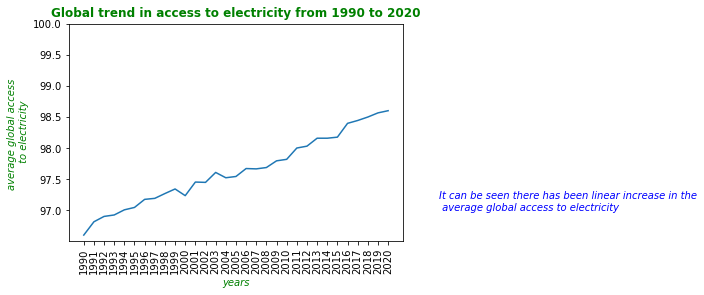

In [35]:
sns.lineplot(y = data2T['mean per year'], x = data2T.index)
plt.ylim(top = 100)
plt.title('Global trend in access to electricity from 1990 to 2020', pad = 7,
         fontdict = {'color': 'green', 'weight': 'bold'});
plt.xlabel('years', fontdict = {'color': 'green', 'weight': 'light', 'style': 'italic'})
plt.ylabel('average global access \n to electricity', 
           fontdict = {'color': 'green', 'weight': 'light', 'style': 'italic'});
plt.xticks(rotation = 90);
plt.text(35, 97, 'It can be seen there has been linear increase in the\n\
 average global access to electricity', fontdict = {'color': 'blue', 'weight': 'light',\
                                                'style': 'italic'});

### Conclusion
<b> From the analysis there has been significant progress towards this target of SDG7. 
    * More focus can be directed to countries with small positive change and small % of thir population with access to electricity
    * Countries with no change can still maintain their strategies because they have high percent access to electricity
    * There can be more investigations on `Turks and Caicos Island` and `Syrian Arabic Republic` 
    to see why there might be decrease in access to electricity
    * Afghanistan can be studied  to see why they sometimes have sudden drop and how they manage 
    to get back on track immediately
    * Solomon Islands can also be studied to see how they were able to increase access to electricity and even though they are still increasing, there should be more studies to see how they can increase
    

In [36]:
!jupyter nbconvert Target_7_1.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Target_7_1.ipynb to slides
[NbConvertApp] Writing 1717419 bytes to Target_7_1.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "c:\users\hafsah f. anibaba\anaconda364\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\users\hafsah f. anibaba\anaconda364\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Hafsah F. Anibaba\Anaconda364\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\hafsah f. anibaba\anaconda364\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\hafsah f. anibaba\anaconda364\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "c:\users\hafsah f. anibaba\anaconda364\lib\si